In [144]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
import os
import seaborn as sns; sns.set()
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from requests import get
from bs4 import BeautifulSoup
from pandas.util import hash_pandas_object

In [2]:
data = pd.read_csv('../data/en.openfoodfacts.org.products.csv', sep = '\t')

/Users/Matt/anaconda3/envs/ada/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,24,25,26,28,44,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
header = data.columns
odf = pd.DataFrame()
for index in header:
    odf[index] =( [index , sum(data[index].notnull())/1023451*100  , data[index].value_counts().head(4).index.tolist() ])
odf=odf.T
odf =odf.drop(columns=0)
odf=odf.rename(columns={1: "%", 2: "exemple top-4"})

In [4]:
odfcut=odf[odf["%"]>=3]

In [5]:
odfcut.to_csv('odfcut.csv')


Categories each product according to the PNNS

In [6]:
pnns_category = {'Dairies','Composite','Fish Meat Eggs','Beverages','Fat Sauces','Fruits Vegetables','Starchy','Snacks'}

In [7]:
data.pnns_groups_1.value_counts()

unknown                    716232
Sugary snacks               57997
Milk and dairy products     43467
Fish Meat Eggs              42475
Cereals and potatoes        34187
Beverages                   29118
Fat and sauces              28114
Composite foods             25430
Fruits and vegetables       24419
Salty snacks                19825
sugary-snacks                3469
fruits-and-vegetables        2898
cereals-and-potatoes           43
salty-snacks                    5
Name: pnns_groups_1, dtype: int64

In [8]:
pnns1_category = {'unknown' : 'Unknown',
 'Sugary snacks' : 'Snacks', 
 'Milk and dairy products' : 'Dairies',
 'Composite foods' : 'Composite', 
 'Cereals and potatoes' : 'Starchy', 
 'Fish Meat Eggs' : 'Fish Meat Eggs',
 'Beverages' : 'Beverages',
 'Fat and sauces' : 'Fat Sauces',
 'Fruits and vegetables' : 'Fruits Vegetables',
 'Salty snacks' : 'Snacks',
 'fruits-and-vegetables' : 'Fruits Vegetables',
 'sugary-snacks' : 'Snacks',
 'cereals-and-potatoes' : 'Starchy',
 'salty-snacks' : 'Snacks'
}
data['Category_Food'] = data['pnns_groups_1'].replace(pnns1_category)

In [9]:
data.Category_Food.value_counts()

Unknown              716232
Snacks                81296
Dairies               43467
Fish Meat Eggs        42475
Starchy               34230
Beverages             29118
Fat Sauces            28114
Fruits Vegetables     27317
Composite             25430
Name: Category_Food, dtype: int64

More category from 'main_category_en' source

In [10]:
data['main_category_en'].value_counts().head(30)

Plant-based foods and beverages    86518
Snacks                             51656
Beverages                          43688
Dairies                            38129
Meats                              31497
Groceries                          23517
Meals                              17557
Desserts                            7435
Spreads                             7272
Seafood                             7198
Fruit juices                        6415
Canned foods                        4731
Frozen foods                        4138
Biscuits and cakes                  3412
Sweeteners                          2488
Dietary supplements                 1995
Breakfasts                          1861
Vinegars                            1764
Sandwiches                          1760
Fats                                1674
Farming products                    1631
Fish and meat and eggs              1604
Fruit-juices-and-nectars            1241
Baby foods                          1231
Pies            

In [11]:
maincategoryen_category = {'unknown' : 'Unknown',
'Plant-based foods and beverages' : 'Berevages',
'Snacks' : 'Snacks',
'Beverages' : 'Beverages',
'Dairies' : 'Dairies' ,
'Meats' : 'Fish Meat Eggs',
'Meals' : 'Composite',
'Desserts' : 'Snacks',
'Seafood' : 'Fish Meat Eggs',
'Fruit juices' : 'Berevages',
'Biscuits and cakes' : 'Snacks',
'Fats' : 'Fat Sauces', 
'Fish and meat and eggs' : 'Fish Meat Eggs',
'Fruit-juices-and-nectars' : 'Berevages'
                          }

data['Category_Food_frommaincategoryen'] = data['main_category_en'].replace(maincategoryen_category)

In [12]:
data['Category_Food_frommaincategoryen'] = np.where(data['Category_Food_frommaincategoryen'].isin(pnns_category)==False,'Unknown',data['Category_Food_frommaincategoryen'])

In [13]:
data['Category_Food']= np.where(data['Category_Food']=='Unknown', data['Category_Food_frommaincategoryen'], data['Category_Food'])
                                                   

In [14]:
data.pnns_groups_1.value_counts()

unknown                    716232
Sugary snacks               57997
Milk and dairy products     43467
Fish Meat Eggs              42475
Cereals and potatoes        34187
Beverages                   29118
Fat and sauces              28114
Composite foods             25430
Fruits and vegetables       24419
Salty snacks                19825
sugary-snacks                3469
fruits-and-vegetables        2898
cereals-and-potatoes           43
salty-snacks                    5
Name: pnns_groups_1, dtype: int64

In [15]:
data.Category_Food.value_counts()

Unknown              700489
Snacks                86055
Dairies               45034
Fish Meat Eggs        42484
Beverages             38526
Starchy               34230
Fat Sauces            28114
Fruits Vegetables     27317
Composite             25430
Name: Category_Food, dtype: int64

In [16]:
data[data['Category_Food']=='Unknown']['categories'].value_counts()

Compléments alimentaires                                                                                                                      350
Protein bars                                                                                                                                  328
Pancake mixes                                                                                                                                 260
Licensed products                                                                                                                             258
Maple syrups                                                                                                                                  235
                                                                                                                                             ... 
Yaghourt                                                                                                                    

In [17]:
data.packaging.value_counts()[19:40]

barquette                      1141
Sachet,plastique               1050
carton,plastique                998
Sachet plastique                975
conserve                        957
pot                             944
Karton                          904
Bocal,Verre,Couvercle,Métal     874
Carton,Plastique                847
Sachet                          809
boîte                           739
carton,boîte,plastique          718
bouteille,plastique             716
Plastik                         703
Plástico                        687
sachet plastique                681
plastic                         660
Dose                            653
Stück                           641
Barquette,Plastique,Frais       581
bouteille,verre                 578
Name: packaging, dtype: int64

In [18]:
pack_mapping = dict.fromkeys(['plastic', 'plastique,frais','plastique', 'barquette,plastique', 'sachet,plastique',
                              'frais,plastique','carton,plastique','carton,plastique,surgele','flacon,plastique'
                 'sachet-plastique','carton,boite,plastique', 'boite,plastique', 'plastique,carton','sachet-plastique',
                'sachet,plastique,surgele','barquette,plastique,frais','pot,plastique','plastique,sachet',
                             'plastico','boite,carton,plastique','frais,plastique,carton','frais,carton,plastique',
                              'carton,sachet,plastique','kunststoff','barquette,film,plastique,sous-atmosphere-protectrice',
                             'carton,surgele,plastique','plastique,barquette','sachet,plastique,frais',
                             'barquette,plastique,sous-atmosphere-protectrice','frais,barquette,plastique,opercule,film-plastique,sous-atmosphere-protectrice',
                             'sachet,plastique,carton','film,plastique','sachet,plastique,sous-atmosphere-protectrice',
                             'bolsa-de-plastico,ultracongelado','barquette-plastique','plastique,sous-vide','plastic,bag',
                             'barquette,film,plastique','plastik','plastica','pot-plastique','plastic-bag','boite-plastique',
                             'frais,barquette,plastique','05-pp','pp','sachet,plastique,etui,carton','bolsa-de-plastico',
                             'boite,carton,sachet,plastique','pot,plastique,frais','botella,plastico','sachet,plastique,doypack',
                             'sachet,plastique,sachet','plastique,boite','plastique,surgele','sac-plastique'],'Plastic')

pack_mapping.update(dict.fromkeys(['bouteille,verre','carton','boite,carton','carton,surgele','karton','carton,boite','karton,kunststoff',
                                  'sachet,papier','papier','bouteille,plastique','conserve','bocal,verre','glas',
                                  'bouteille','conserve,metal','bocal,verre,couvercle,metal','bocal,verre,metal',
                                  'verre','verre,bouteille','pot,verre','bocal','verre,bocal',
                                  'flacon,plastique','bouteille-plastique','bottle','canned','pot-en-verre','bolsa,plastico',
                                   'bouteille-verre','bocal-en-verre','verre,bocal,metal','plastique,bouteille','bouteille-en-verre','canette','pot,verre,couvercle,metal',
                                  'glas,mehrwegpfand','carton,aluminium','boite,metal','botella-de-plastico','boite-carton',
                                  'plastic-bottle','sous-vide','plastic,bottle','can','pot-en-plastique','glass','caja,carton','bote-de-vidrio',
                                  'boite,conserve,metal','pet','becher','lata','bocal-verre','aluminium','caja-de-carton','bouteille,verre,capsule,metal',
                                  'bokaal,glas','konserve','paper','glass-bottle','bocal,verre,couvercle,metal,conserve','glass-jar',
                                  'glasflasche','flacon-verre','glas,flasche','kunststoff,karton','papier,aluminium','boite-de-conserve',
                                  'pot-verre','canette,metal','carton,brique','flacon,verre','caja,carton,lata,en-conserva','bocal-verre,couvercle-metal','glass,bottle',
                                  'conserve,boite,metal','carton,sachet','canette,aluminium','boite-en-carton','conserve,conserve'],'Recyclable'))

pack_mapping.update(dict.fromkeys(['frais','surgele','surgele,carton,plastique','brique,carton','tetra-pak','tetra-brik','tetrapak',
                                  'brique','tetrapack','surgele,carton','barquette,film,plastique,frais,sous-atmosphere-protectrice','sous-atmosphere-protectrice',
                                  'carton,plastique,frais','frais,pot,plastique'],'Non-Recyclable'))


data['emballage'] = data['packaging_tags'].replace(pack_mapping)

In [19]:
data['emballage'].value_counts()

Recyclable                                     46498
Plastic                                        45494
Non-Recyclable                                  6570
sachet                                          3352
barquette                                       1511
                                               ...  
brique,carton,plastique,paille                     1
surgeles,surgele,plastique,sachet                  1
frais,film,plastique,atmosphere-protectrice        1
caserola                                           1
marineira                                          1
Name: emballage, Length: 26508, dtype: int64

# NUTRISCORE
https://quoidansmonassiette.fr/comment-est-calcule-le-nutri-score-logo-nutritionnel/



### Import just enough field

In [222]:
data[(data['main_category_en'] == 'Fruit juices')]['fruits-vegetables-nuts_100g'].fillna(100, inplace=True)

In [223]:
selected_enough_field =[
    'Category_Food',
    'energy_100g','sugars_100g','saturated-fat_100g','sodium_100g',
    'fruits-vegetables-nuts_100g','fiber_100g','proteins_100g',
    'nutrition-score-uk_100g'
]

In [224]:
data_beverages = data[data['Category_Food']=='Beverages'][selected_enough_field]
data_fatsauces = data[data['Category_Food']=='Fat Sauces'][selected_enough_field]
data_without_beverage_fat = data[(data['Category_Food']!='Fat Sauces') & (data['Category_Food']!='Beverages') ][selected_enough_field]
                                    
                                    

### Calculation of negative points

In [225]:
## ENERGY
# energy bins
energy_bins_without_beverage_fat = [data_without_beverage_fat['energy_100g'].min() - 1, 335, 670, 1005, 1340, 1675, 2010, 2345, 2680, 3015, 3350, data_without_beverage_fat['energy_100g'].max()]
energy_bins_fatsauces = [data_fatsauces['energy_100g'].min() - 1, 335, 670, 1005, 1340, 1675, 2010, 2345, 2680, 3015, 3350, data_fatsauces['energy_100g'].max()]
energy_bins_beverages = [data_beverages['energy_100g'].min() - 1, 0, 30, 60, 90, 120, 150, 180, 210, 240, 270, data_beverages['energy_100g'].max()]
# energy point
data_without_beverage_fat['energy_points'] = pd.cut(data_without_beverage_fat['energy_100g'], energy_bins_without_beverage_fat, labels=range(11)).astype(float)
data_fatsauces['energy_points'] = pd.cut(data_fatsauces['energy_100g'], energy_bins_fatsauces, labels=range(11)).astype(float)
data_beverages['energy_points'] = pd.cut(data_beverages['energy_100g'], energy_bins_beverages, labels=range(11)).astype(float)


## SUGAR
# sugar bins
sugar_bins_without_beverage_fat = [data_without_beverage_fat['sugars_100g'].min() - 1, 0, 1.5, 3, 4.5, 6, 7.5, 9, 10.5, 12, 13.5, data_without_beverage_fat['sugars_100g'].max()]
sugar_bins_fatsauces = [data_fatsauces['sugars_100g'].min() - 1, 0, 1.5, 3, 4.5, 6, 7.5, 9, 10.5, 12, 13.5, data_fatsauces['sugars_100g'].max()]
sugar_bins_beverages = [data_beverages['sugars_100g'].min() - 1, 4.5, 9, 13.5, 18, 22.5, 27, 31, 36, 40, 45, data_beverages['sugars_100g'].max()]
# sugar point (CHANGE SUGAR_BINS)
data_without_beverage_fat['sugar_points'] = pd.cut(data_without_beverage_fat['sugars_100g'], sugar_bins_without_beverage_fat, labels=range(11)).astype(float)
data_fatsauces['sugar_points'] = pd.cut(data_fatsauces['sugars_100g'], sugar_bins_fatsauces, labels=range(11)).astype(float)
data_beverages['sugar_points'] = pd.cut(data_beverages['sugars_100g'], sugar_bins_beverages, labels=range(11)).astype(float)


## SATURATED FAT
# s-fat bins
fat_bins_without_beverage_fat = [data_without_beverage_fat['saturated-fat_100g'].min() - 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, data_without_beverage_fat['saturated-fat_100g'].max()]
fat_bins_beverages = [data_beverages['saturated-fat_100g'].min() - 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, data_beverages['saturated-fat_100g'].max()]
fat_bins_fatsauces = [data_fatsauces['saturated-fat_100g'].min() - 1, 10, 16, 22, 28, 34, 40, 46, 52, 58, 64, data_fatsauces['saturated-fat_100g'].max()]
# s-FAT point (CHANGE FAT_BINS)
data_without_beverage_fat['saturated-fat_points'] = pd.cut(data_without_beverage_fat['saturated-fat_100g'], fat_bins_without_beverage_fat, labels=range(11)).astype(float)
data_beverages['saturated-fat_points'] = pd.cut(data_beverages['saturated-fat_100g'], fat_bins_beverages, labels=range(11)).astype(float)
data_fatsauces['saturated-fat_points'] = pd.cut(data_fatsauces['saturated-fat_100g'], fat_bins_fatsauces, labels=range(11)).astype(float)


## SODIUM
# sodium bins
sodium_bins = [data['sodium_100g'].min() - 1, 90, 180, 270, 360, 450, 540, 630, 720, 810, 900, data['sodium_100g'].max()]
# sodium points
data_without_beverage_fat['sodium_points'] = pd.cut(data_without_beverage_fat['sodium_100g'], sodium_bins, labels=range(11)).astype(float)
data_beverages['sodium_points'] = pd.cut(data_beverages['sodium_100g'], sodium_bins, labels=range(11)).astype(float)
data_fatsauces['sodium_points'] = pd.cut(data_fatsauces['sodium_100g'], sodium_bins, labels=range(11)).astype(float)



### Calculation positive points

In [226]:
# FRUITS
# fruits bins
fruits_bins_without_beverage_fat = [data_without_beverage_fat['fruits-vegetables-nuts_100g'].min() - 1, 40, 60, 80, data_without_beverage_fat['fruits-vegetables-nuts_100g'].max()]
fruits_bins_fatsauces = [data_fatsauces['fruits-vegetables-nuts_100g'].min() - 1, 40, 60, 80, data_fatsauces['fruits-vegetables-nuts_100g'].max()]
fruits_bins_beverages = [data_beverages['fruits-vegetables-nuts_100g'].min() - 1, 40, 60, 80, data_beverages['fruits-vegetables-nuts_100g'].max()]
# fruits points
data_without_beverage_fat['fruits_points'] = pd.cut(data_without_beverage_fat['fruits-vegetables-nuts_100g'], fruits_bins_without_beverage_fat, labels=[0,1,2,5]).astype(float)
data_beverages['fruits_points'] = pd.cut(data_beverages['fruits-vegetables-nuts_100g'], fruits_bins_beverages, labels=[0,2,4,10]).astype(float)
data_fatsauces['fruits_points'] = pd.cut(data_fatsauces['fruits-vegetables-nuts_100g'], fruits_bins_fatsauces, labels=[0,1,2,5]).astype(float)


# FIBRES
# fibers bins
fibers_bins = [data['fiber_100g'].min() - 1, 0.7, 1.4, 2.1, 2.8, 3.5, data['fiber_100g'].max()]
# fibers points
data_without_beverage_fat['fiber_points'] = pd.cut(data_without_beverage_fat['fiber_100g'], fibers_bins, labels=range(6)).astype(float)
data_beverages['fiber_points'] = pd.cut(data_beverages['fiber_100g'], fibers_bins, labels=range(6)).astype(float)
data_fatsauces['fiber_points'] = pd.cut(data_fatsauces['fiber_100g'], fibers_bins, labels=range(6)).astype(float)

# PROTEINS
# proteins bins
proteins_bins = [data['proteins_100g'].min() - 1, 1.6, 3.2, 4.8, 6.4, 8.0, data['proteins_100g'].max()]
# proteins points
data_without_beverage_fat['proteins_points'] = pd.cut(data_without_beverage_fat['proteins_100g'], proteins_bins, labels=range(6)).astype(float)
data_beverages['proteins_points'] = pd.cut(data_beverages['proteins_100g'], proteins_bins, labels=range(6)).astype(float)
data_fatsauces['proteins_points'] = pd.cut(data_fatsauces['proteins_100g'], proteins_bins, labels=range(6)).astype(float)


In [227]:
frames = [data_without_beverage_fat, data_beverages, data_fatsauces]

In [228]:
nutridata = pd.concat(frames)

In [229]:
nutridata['fruits_points'].fillna(0, inplace=True)
nutridata['fiber_points'].fillna(0, inplace=True)
nutridata['proteins_points'].fillna(0, inplace=True)

In [230]:
nutridata['points_N']= nutridata['energy_points'] + nutridata['saturated-fat_points'] + nutridata['sugar_points'] + nutridata['sodium_points']
nutridata['points_P'] = nutridata['fruits_points'] + nutridata['fiber_points'] + nutridata['proteins_points']

In [231]:
def compute_score(row):
    N = row['points_N']
    P = row['points_P']
    fruit = row['fruits_points']
    fiber = row['fiber_points']
    if N < 11 or fruit == 5:
        return N - P
    else:
        return N - (fiber + fruit)

In [232]:
nutridata['nutri-score_calculated'] = nutridata.apply(compute_score, axis=1)

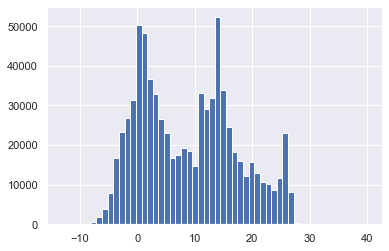

In [233]:
nutridata['nutri-score_calculated'].hist(bins=int(nutridata['nutri-score_calculated'].max() - nutridata['nutri-score_calculated'].min() + 1));

In [234]:
sum(nutridata['nutri-score_calculated'].notnull())

770332

In [235]:
sum(nutridata['nutrition-score-uk_100g'].notnull())

294476

In [236]:
nutridata_beverages = nutridata[nutridata['Category_Food']=='Beverages']
nutridata_not_beverages = nutridata[nutridata['Category_Food']!='Beverages']

In [237]:
# NUTRILETTER

#letter bins
letter_bins_aliments = [nutridata['nutri-score_calculated'].min() - 1, 0, 2.9, 10.9, 18.9, nutridata['nutri-score_calculated'].max()]
letter_bins_beverages = [nutridata['nutri-score_calculated'].min() - 1, 2.5, 5.5, 9.5, nutridata['nutri-score_calculated'].max()]

#letter
nutridata_not_beverages['nutri-score_letter_CALCULATED'] = pd.cut(nutridata_not_beverages['nutri-score_calculated'], letter_bins_aliments, labels=['a','b','c','d','e'])
nutridata_beverages['nutri-score_letter_CALCULATED'] = pd.cut(nutridata_beverages['nutri-score_calculated'], letter_bins_beverages, labels=['b','c','d','e'])


/Users/Matt/anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Matt/anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [238]:
nutriframes = [nutridata_not_beverages, nutridata_beverages]
nutridata = pd.concat(nutriframes)

In [239]:
def nutri_score_letter(row):
    nutri_score = row['nutri-score_calculated']
    
    # check if nutri_score is nan
    if nutri_score != nutri_score:
        return np.nan
    
    if row['Category_Food'] == 'Beverages':
        if nutri_score <= 2:
            return 'B'
        elif nutri_score <= 5:
            return 'C'
        elif nutri_score <= 9:
            return 'D'
        else:
            return 'E'
    else:
        if nutri_score <= 0:
            return 'A'
        elif nutri_score <= 2:
            return 'B'
        elif nutri_score <= 10:
            return 'C'
        elif nutri_score <= 18:
            return 'D'
        else:
            return 'E'

In [240]:
nutridata['nutri-score_letter'] = nutridata.apply(nutri_score_letter, axis=1)

In [241]:
nutridata['nutri-score_letter'].value_counts()

D    247553
A    160302
C    156528
E    118148
B     87801
Name: nutri-score_letter, dtype: int64

In [242]:
nutridata['nutri-score_letter_CALCULATED'].value_counts()

d    247553
a    160302
c    156528
e    118148
b     87801
Name: nutri-score_letter_CALCULATED, dtype: int64